# By Ditipriya Seal

# The Sparks Foundation

# Data Science and Business Analytics

# Task 1: Prediction Using Supervised ML

# The aim of this task is to predict the percentage of an student based on the number of study hours

In [1]:
# Importing all libraries required in this task
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from the given link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head() #prints the first 5 lines of the dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#prints the last 5 lines of the dataset
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
#it provides a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#it will give us the total number of rows and columns
data.shape

(25, 2)

In [6]:
#returns a statistical summary
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


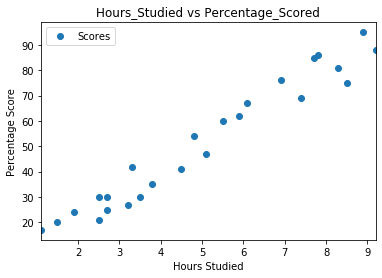

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours_Studied vs Percentage_Scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
data.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [11]:
# we divide the data into attributes(inputs) and labels(outputs)
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [12]:
# we split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [13]:
# We have splitted our data into training and testing sets and now we will train our algorithm
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

print("Training completed.")

Training completed.


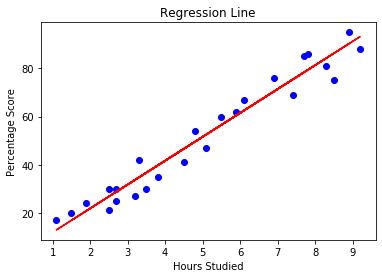

In [15]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y, color="blue")
plt.plot(X, line, color="red")
plt.title("Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [16]:
# we have trained our model, now we will make some predictions
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


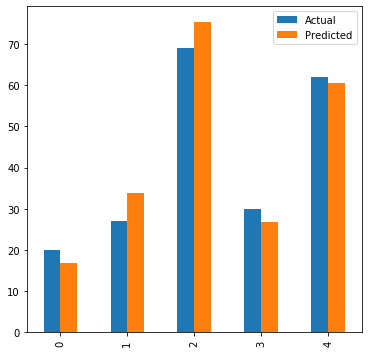

In [18]:
dataframe.plot(kind="bar", figsize=(6,6))
plt.show()

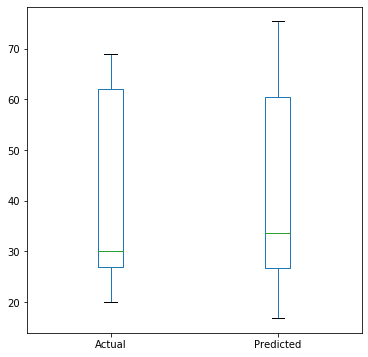

In [19]:
dataframe.plot(kind="box", figsize=(6,6))
plt.show()

In [24]:
# You can also test with your own data
hours = [[9.25]]
pred = lr.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [28]:
from sklearn import metrics  
print('Mean Absolute Error =', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error =', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error = 4.183859899002975
Mean Squared Error = 21.5987693072174
